# Questions
## From a dataset of reported type 1 crimes in Houston Texas from 2010- 2017
## only from selected police beats around stadiums

- Type of offense  max values
- Total crimes by week
- Total crimes by Month
- Total crimes by Year
- Total crimes by the Hour
- Total crimes by the top 10 Premise locations
- Total crimes by the top 10 (Police) Beat location
- Compare the two lowest offense types (rape & murder) by Year, Month, Weekday

In [1]:
import pandas as pd
import numpy as np
import glob, os
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set_style("darkgrid")
#sns.set_context("paper")
#sns.despine()
#sns.despine(left=True)

current_palette = sns.color_palette("hls", 8)
import plot_func as pf

In [2]:
ls beat_crime/

beat_10H10.csv*  beat_10H50.csv*  beat_10H80.csv*
beat_10H30.csv*  beat_10H60.csv*  beat_15E40.csv*
beat_10H40.csv*  beat_10H70.csv*  beat_1A10.csv*


## Load Dataset

In [3]:
# path of files
path = 'beat_crime/'
# combine path files
all_files = glob.glob(os.path.join(path, "*.csv")) 
# loop over
df_from_each_file = (pd.read_csv(f) for f in all_files)
df  = pd.concat(df_from_each_file, ignore_index=True)
##  change date as datetime and index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index(ascending=True)
df.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2010-01-01,10H10,1900-1999,runnels,Theft,street,1.0,20,1,Friday,Jan,2010
2010-01-01,10H40,2400-2499,san jacinto,Theft,bar_nc,1.0,1,1,Friday,Jan,2010
2010-01-01,10H60,3500-3599,macgregor,Theft,apartment,1.0,0,1,Friday,Jan,2010
2010-01-01,10H60,3700-3799,odin,Theft,apartment,1.0,6,1,Friday,Jan,2010
2010-01-01,10H60,2500-2599,southmore,Burglary,apartment,1.0,0,1,Friday,Jan,2010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 137746 entries, 2010-01-01 to 2017-12-31
Data columns (total 11 columns):
Beat           137746 non-null object
BlockRange     137746 non-null object
StreetName     137746 non-null object
OffenseType    137746 non-null object
Premise        137746 non-null object
NumOffenses    137746 non-null float64
Hour           137746 non-null object
day            137746 non-null object
weekday        137746 non-null object
month          137746 non-null object
year           137746 non-null object
dtypes: float64(1), object(10)
memory usage: 12.6+ MB


In [5]:
df.Hour.value_counts(dropna=False)

12    7590
17    7564
18    7478
15    7206
0     7166
16    7048
10    6870
14    6836
22    6760
9     6748
11    6744
19    6692
13    6440
8     6424
20    6376
23    6076
21    6050
7     4636
1     4084
2     3926
6     2864
3     2584
4     1794
5     1790
Name: Hour, dtype: int64

## Selected police beats

In [6]:
print(df.Beat.value_counts(dropna=False))

1A10     30650
10H70    22846
10H40    20920
10H50    16034
10H60    15394
10H80    14962
10H30     8796
10H10     8144
Name: Beat, dtype: int64


## Offense Type

In [ ]:
df.OffenseType.value_counts(dropna=False)

In [ ]:
def barplot(frame,col,title,nums=True,save=False):    
    fig,ax = plt.subplots(figsize=(10,5))
    ax = sns.countplot(x=col,data=frame,alpha=0.65, order=frame['{}'.format(col)].value_counts().index)
    max_value = frame['{}'.format(col)].value_counts().max()

    plt.ylim(0,max_value+(max_value/8))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
    ax.set_title(title)

    height_factor=1.05
    if nums == True:
        for i in ax.patches:
            height = i.get_height()
            ax.text(i.get_x() + i.get_width()/2., height_factor*height,'%d' % int(height), ha='center', va='bottom')

    if save==True:
        plt.savefig('{}.png'.format(title))

In [ ]:
print(plt.style.available)

In [ ]:
plt.style.use(['ggplot'])
#sns.set_style("darkgrid", {"axes.facecolor": ".9"})


t='2010-2017 Total Offenses'


pf.barplot(df,'OffenseType',t,save=True)

## Offense Type & Year

In [ ]:
t='Total Offenses :Year'


pf.barplot(df,'year',t,save=True)

## OffenseType and Month

In [ ]:
t='Total Offenses :Month'
xlab = ''
ylab = ''

pf.barplot(df,'month',t,save=True)

## Offensetype and Weekday

In [ ]:
t='Total Offenses :Weekday'
xlab = ''
ylab = ''

pf.barplot(df,'weekday',t,save=True)

## OffenseType and Hour

In [ ]:
t='Total Offenses :Hour'
xlab = ''
ylab = ''

pf.barplot(df,'Hour',t,nums=False,save=True)

## OffenseType & Day

In [ ]:
t='Total Offenses :Day'
xlab = ''
ylab = ''

pf.barplot(df,'day',t,xlab,ylab,nums=False,save=True)

## List of top 10 premises, breats, street names

In [ ]:
# list of top 10 premises, beats, street names
premises = [premise for premise in df['Premise'].value_counts().head(10).reset_index()['index']]
beats= [beat for beat in df['Beat'].value_counts().head(10).reset_index()['index']]
streets = [street for street in df['StreetName'].value_counts().head(10).reset_index()['index']]

## OffenseType & Beat(top10)

In [ ]:
beats_10 = df[df.Beat.isin(beats)]
beats_10.Beat.value_counts(dropna=False)

In [ ]:
t='Offense type: Beat'
xlab = ''
ylab = 'Crimes'

pf.barplot(beats_10,'Beat',t,save=True)

## OffenseType & Premise (Top 10)

In [ ]:
premise_10 = df[df.Premise.isin(premises)]
premise_10.Premise.value_counts(dropna=False)

In [ ]:
t='Offense type: Premise'
xlab = ''
ylab = 'Crimes'

pf.barplot(premise_10,'Premise',t,save=True)

## OffenseType & StreetName (top 10)

In [ ]:
street_10 = df[df.StreetName.isin(streets)]
street_10.StreetName.value_counts(dropna=False)

In [ ]:
t='Offense type: StreetName'
xlab = ''
ylab = ''

pf.barplot(street_10,'StreetName',t,save=True)

## Comparison

In [ ]:
# create a dataframe with just the two bottom offense types
dfrm = df.loc[(df.OffenseType =='Rape') | (df.OffenseType =='Murder')]

In [ ]:
t='Offense type: Rape & Murder by Year'
xlab = ''
ylab = 'Crimes'

pf.couplot(dfrm,'year',t,xlab,ylab,nums=True,save=True)

In [ ]:
t='Offense type: Rape & Murder by Month from 2010-2017'
xlab = ''
ylab = ''

pf.couplot(dfrm,'month',t,xlab,ylab,save=True)

In [ ]:
t='Offense type: Rape & Murder by Weekday from 2010-2017'
xlab = ''
ylab = ''

pf.couplot(dfrm,'weekday',t,xlab,ylab,save=True)

In [ ]:
t='Offense type: Rape & Murder by Hour from 2010-2017'
xlab = ''
ylab = ''

pf.couplot(dfrm,'Hour',t,xlab,ylab,save=True)

## Timeline

In [7]:
pt = pf.offense_df(df)
df_aa = df[pt['Aggravated Assault']]
df_b = df[pt['Burglary']]
df_t = df[pt['Theft']]
df_at = df[pt['Auto Theft']]
df_ra = df[pt['Rape']]
df_ro = df[pt['Robbery']]
df_mu = df[pt['Murder']]

## Timeline fo all Offenses

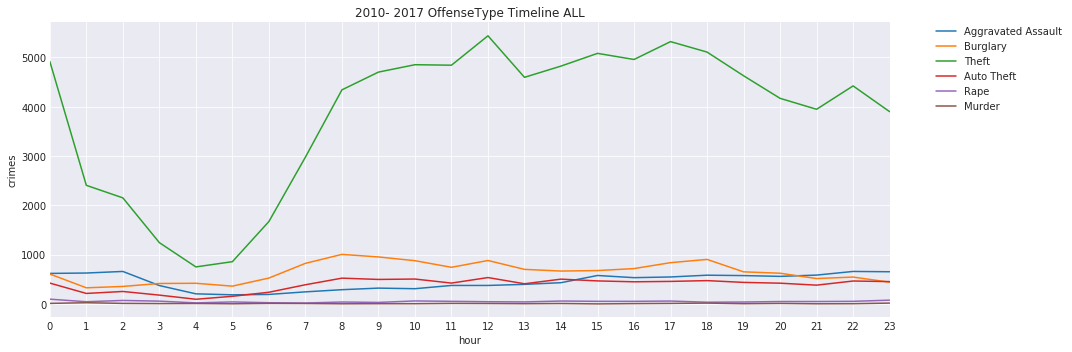

In [8]:
title = '2010- 2017 OffenseType Timeline ALL'
xlab = 'hour'
ylab= 'crimes'
pf.time_plot6d(
            df_aa,'Aggravated Assault',
            df_b,'Burglary',
            df_t,'Theft',
            df_at,'Auto Theft',
            df_ra,'Rape',
            df_mu,'Murder','OffenseType',title,xlab,ylab,save=True)

## Remove Theft

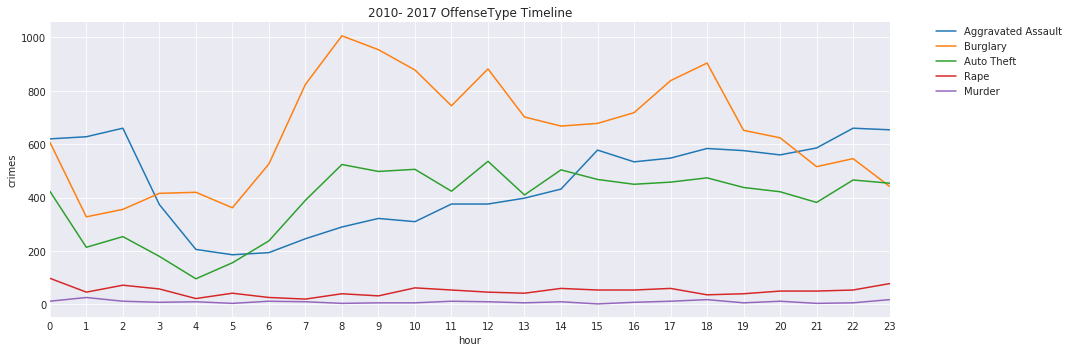

In [9]:
title = '2010- 2017 OffenseType Timeline'
xlab = 'hour'
ylab= 'crimes'
pf.time_plot5d(
            df_aa,'Aggravated Assault',
            df_b,'Burglary',
            df_at,'Auto Theft',
            df_ra,'Rape',
            df_mu,'Murder','OffenseType',title,xlab,ylab,save=True)

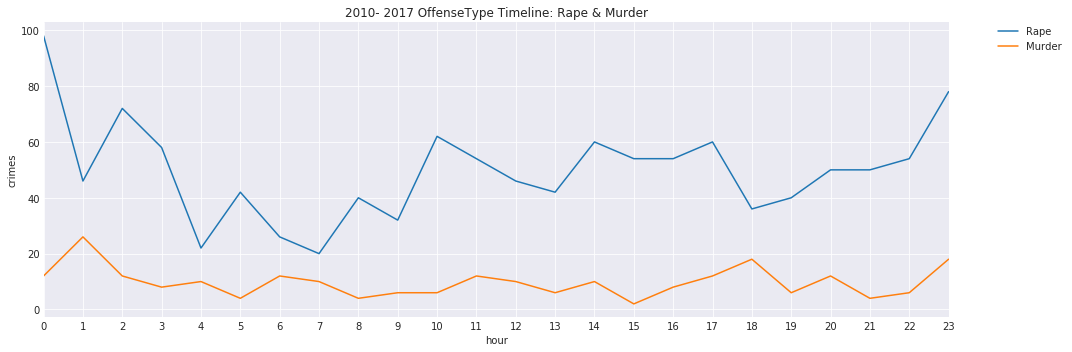

In [11]:
title = '2010- 2017 OffenseType Timeline: Rape & Murder'
xlab = 'hour'
ylab= 'crimes'
pf.time_plot2d(
            df_ra,'Rape',
            df_mu,'Murder','OffenseType',title,xlab,ylab,save=True)

# Answers
## From a dataset of reported type 1 crimes in Houston Texas from 2010- 2017

- Type of offense with the max values
    - Theft $92112$

- Total crimes by week
    - Friday has the most events with $21,710$
    - Sunday has the least with $18,446$
- Total crimes by Month
    - July  has the most events with $88,814$
    - February has the least with 7165
- Total crimes by Year
    - 2010 has the most with $136,357$
    - 2017 has the least with $118,580$
- Total crimes by the Hour ( has several data missing)
    - 6:00 pm is very popular with $4209$ events
    - 04:00 am had only $942$
    
- Total crimes by the top 10 Premise locations
    - Apartment and Apartment parking lot seem to be the most popular locations

- Total crimes by the top 10 (Police) Beat location
    - 19G10 with $21,422$
 
- Compare the two lowest offense types (rape & murder) by Year, Month, Weekday
    - rape was at its lowest on 2013 but it has double since  in only 4 years
    - Saturday and Sunday is the most popular date for rape to occur
    - Murder fluctuates between 200-300 every other year
    - Sunday is the most popular day for murder.